# WT-Übung 6 - Aufgabe 23

Übertragung komplexwertiger Symbole (QPSK) unter additivem weißem Gauß'schem Rauschen (AWGN). Jedes Symbol trägt zwei Bit - je eins im Vorzeichen von Real- bzw. Imaginärteil.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
symbols = [np.exp(1j * np.pi * (2*k+1) / 4) for k in range(4)]
sigma = 1/3
size = 10000  # Anzahl Symbole in Simulation

# Sendesignal
s = np.random.choice(symbols, size)
# Rauschen
n = np.random.normal(0, sigma, size) + 1j * np.random.normal(0, sigma, size)
# Empfangssignal
r = s + n

# Index der korrekt empfangenen Bits
bit_1_correct = np.sign(r.real) == np.sign(s.real)
bit_2_correct = np.sign(r.imag) == np.sign(s.imag)
# Index der korrekt empfangenen Symbole
correct = np.logical_and(bit_1_correct, bit_2_correct)

## Sendesymbole und Rauschen

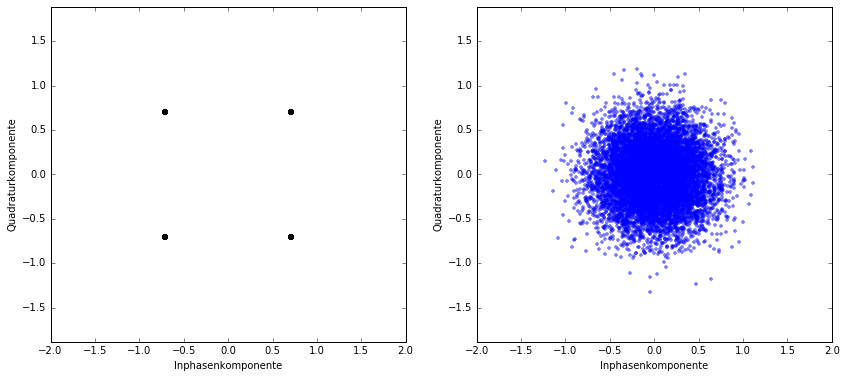

In [3]:
def plot_complex(data, *args, subplot=111, **kwargs):
    ax = fig.add_subplot(subplot)
    ax.set_xlabel('Inphasenkomponente')
    ax.set_ylabel('Quadraturkomponente')
    ax.axis('equal'); ax.axis((-2, 2, -2, 2)); ax.hold(True)
    ax.plot(data.real, data.imag, *args, **kwargs)
    return ax

fig = plt.figure(figsize=(14, 6), facecolor='w')
plot_complex(s, 'k.', markersize=10, subplot=121)
plot_complex(n, '.', subplot=122, alpha=0.5);

## Empfangssignal

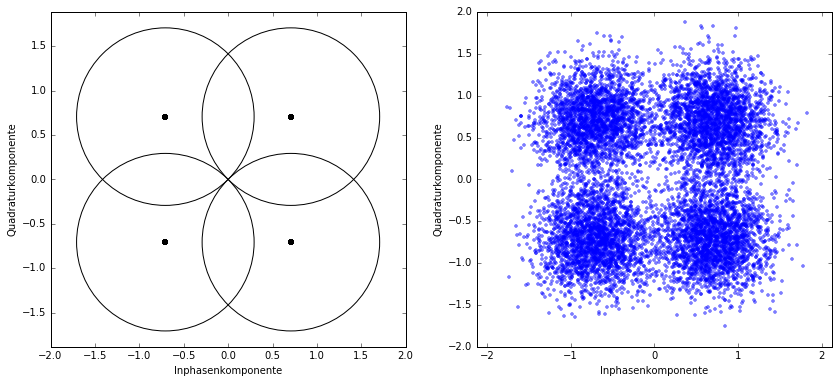

In [4]:
fig = plt.figure(figsize=(14, 6), facecolor='w')
ax = plot_complex(s, 'k.', subplot=121, markersize=10, zorder=10)

for symbol in symbols:
    ax.add_artist(plt.Circle(
        (symbol.real, symbol.imag), radius=3 * sigma, color='k', fill=None))

plot_complex(r, 'b.', subplot=122, alpha=0.5);

## Ergebnisse

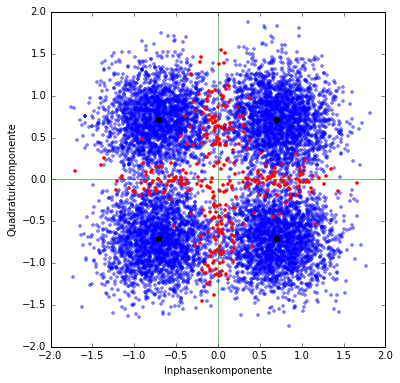

In [5]:
fig = plt.figure(figsize=(6, 6), facecolor='w')
ax = plot_complex(s, 'k.', markersize=10, zorder=10)
ax.plot((-2, 2), (0, 0), 'g', alpha=0.5)  # Entscheidungsgrenzen
ax.plot((0, 0), (-2, 2), 'g', alpha=0.5)
ax.plot(r[ correct].real, r[ correct].imag, 'b.', alpha=0.5)
ax.plot(r[~correct].real, r[~correct].imag, 'r.');

## Übertragungsfehler

Pro Symbol gibt es drei Fehlermuster:
- nur Bit 1 kippt
- nur Bit 2 kippt
- beide Bits kippen

In [6]:
symbol_errors = np.sum(~correct)
bit_errors = np.sum(~bit_1_correct) + np.sum(~bit_2_correct)

print("{} Fehler in {} Symbolen\n{} Fehler in {} Bits".format(
        symbol_errors, size, bit_errors, 2 * size))

338 Fehler in 10000 Symbolen
342 Fehler in 20000 Bits
